In [62]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from geograypher.meshes import TexturedPhotogrammetryMesh

In [63]:
DOWNLOADS_FOLDER = (
    "/ofo-share/repos-david/UCNRS-experiments/data/photogrammetry_products"
)
DATASET_ID = "000614"
IDS_TO_LABELS = {
    0: "BE_bare_earth",
    1: "HL_herbaceous_live",
    2: "MM_man_made_object",
    3: "SD_shrub_dead",
    4: "SL_shrub_live",
    5: "TD_tree_dead",
    6: "TL_tree_live",
    7: "W_water",
}

texture_path = f"/ofo-share/repos-david/UCNRS-experiments/data/geograypher_outputs/face_values/{DATASET_ID}.npy"
mesh_file = Path(DOWNLOADS_FOLDER, "mesh", f"mesh-internal-{DATASET_ID[3:]}.ply")

In [64]:
face_values = np.load(texture_path)
face_values.shape

(6007111, 8)

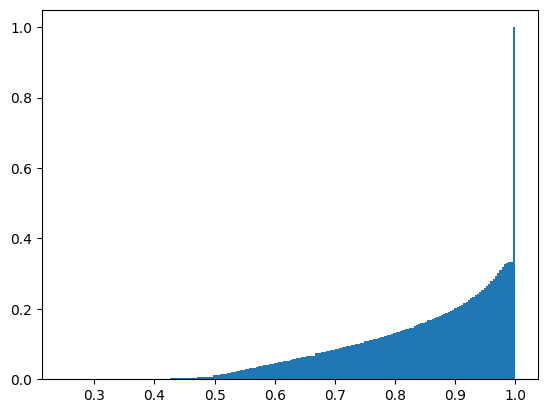

In [65]:
max_value = np.max(face_values, axis=1)

plt.hist(max_value, density=True, cumulative=True, bins=200)
plt.show()

Loading transform to EPSG:4326
Loading mesh
Reading the mesh
Selecting an ROI from mesh
Downsampling the mesh
Extracting faces from mesh
Loading texture


/ofo-share/repos-david/geograypher/geograypher/meshes/meshes.py:1967: RuntimeWarning: invalid value encountered in cast
  vis_scalars = np.clip(vis_scalars, 0, 255).astype(np.uint8)


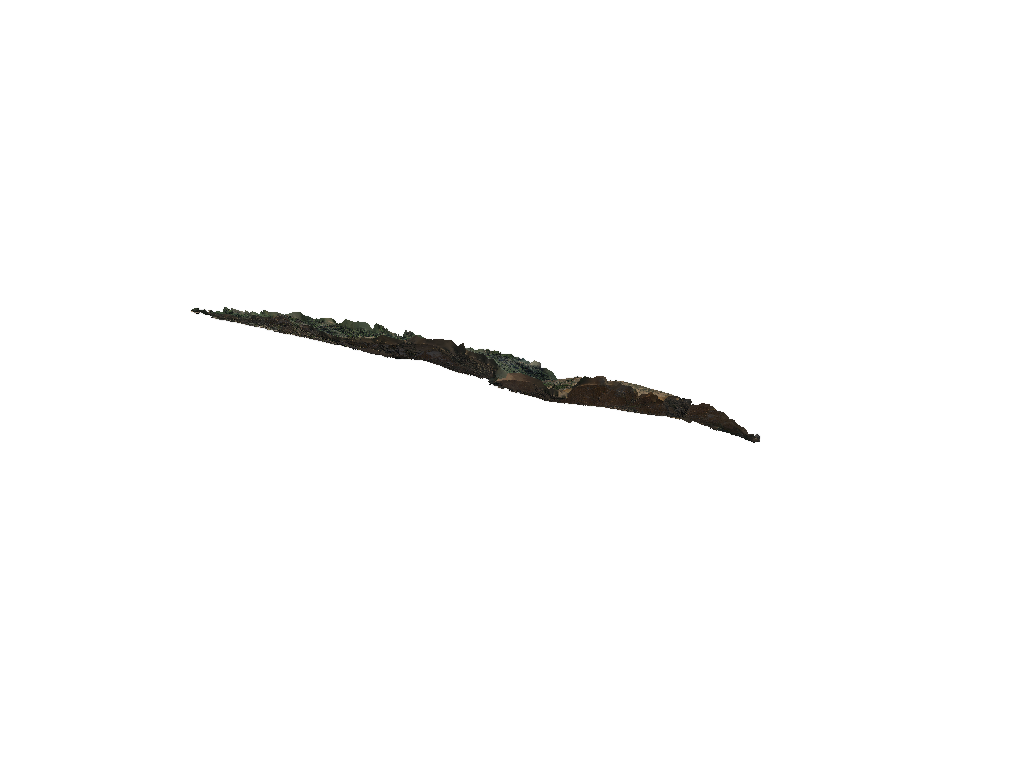

In [66]:
mesh = TexturedPhotogrammetryMesh(mesh_file, downsample_target=0.2)
mesh.vis()

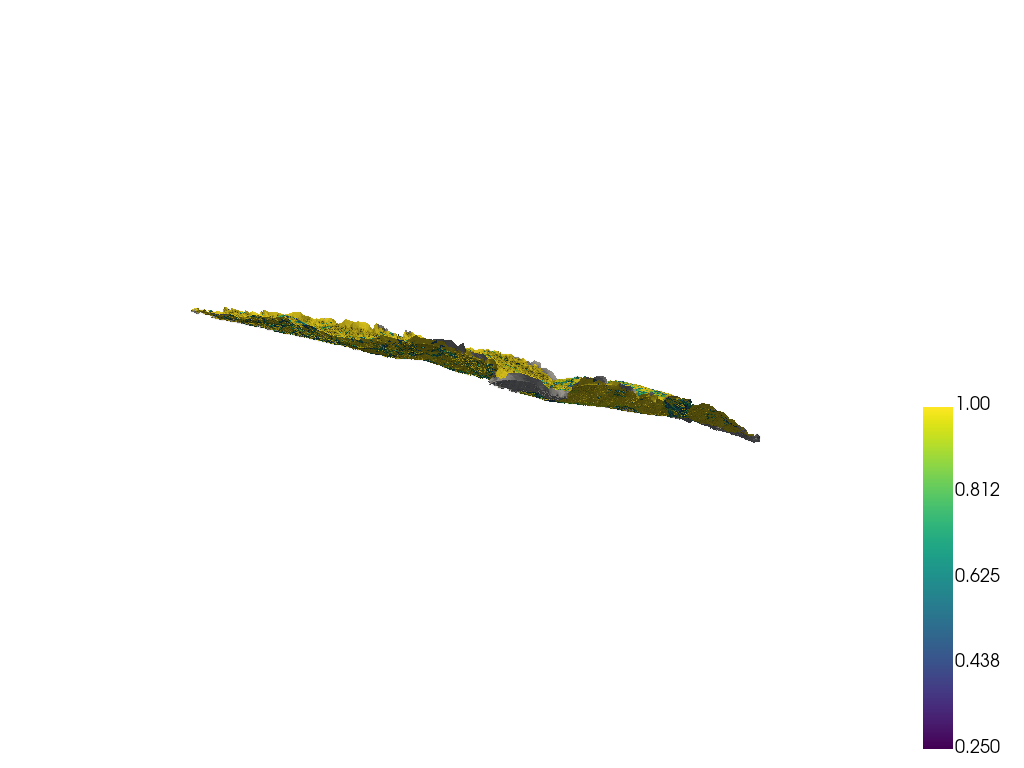

In [67]:
mesh.set_texture(max_value)
mesh.vis()

Loading transform to EPSG:4326
Loading mesh
Reading the mesh
Selecting an ROI from mesh
Downsampling the mesh
Extracting faces from mesh
Loading texture


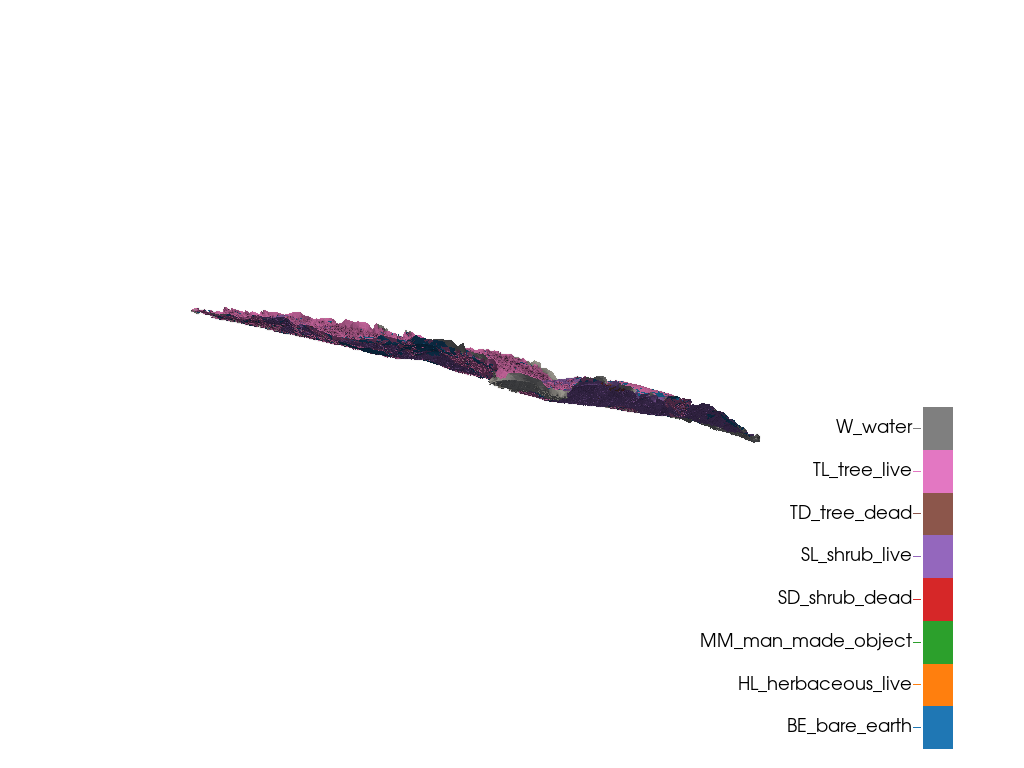

In [69]:
from geograypher.utils.indexing import find_argmax_nonzero_value
max_class = find_argmax_nonzero_value(face_values, keepdims=False)
#max_class[max_value < 0.8] = np.nan
#mesh.set_texture(max_class, IDs_to_labels=IDS_TO_LABELS)
class_mesh = TexturedPhotogrammetryMesh(
    mesh_file,
    downsample_target=0.2,
    texture=max_class,
    IDs_to_labels=IDS_TO_LABELS
)
class_mesh.vis()